In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import string
import time

pd.set_option('display.max_columns', 50)

In [2]:
# reading in fixed metadata

# set data types
cols = ['PROJECT_ID', 'ABSTRACT', 'FY.x', 'PROJECT_TERMS', 'PROJECT_TITLE', 'DEPARTMENT', 'AGENCY', 'IC_CENTER', 
        'PROJECT_NUMBER', 'PROJECT_START_DATE', 'PROJECT_END_DATE', 'CONTACT_PI_PROJECT_LEADER', 'OTHER_PIS', 
        'CONGRESSIONAL_DISTRICT', 'DUNS_NUMBER', 'ORGANIZATION_NAME', 'ORGANIZATION_CITY', 'ORGANIZATION_STATE', 
        'ORGANIZATION_ZIP', 'ORGANIZATION_COUNTRY', 'BUDGET_START_DATE', 'BUDGET_END_DATE', 'CFDA_CODE', 'FY.y', 
        'FY_TOTAL_COST', 'FY_TOTAL_COST_SUB_PROJECTS']
dtypes = {col: 'str' for col in cols}
dtypes["FY_TOTAL_COST"] = 'float'
dtypes["FY_TOTAL_COST_SUB_PROJECTS"] = 'float'

df = pd.read_csv('../../../data/prd/Federal_RePORTER/FR_raw_2021FEB24.csv', dtype = dtypes, engine='python')
print(df.shape)

(1156137, 26)


In [3]:
df.head()

,PROJECT_ID,ABSTRACT,FY.x,PROJECT_TERMS,PROJECT_TITLE,DEPARTMENT,AGENCY,IC_CENTER,PROJECT_NUMBER,PROJECT_START_DATE,PROJECT_END_DATE,CONTACT_PI_PROJECT_LEADER,OTHER_PIS,CONGRESSIONAL_DISTRICT,DUNS_NUMBER,ORGANIZATION_NAME,ORGANIZATION_CITY,ORGANIZATION_STATE,ORGANIZATION_ZIP,ORGANIZATION_COUNTRY,BUDGET_START_DATE,BUDGET_END_DATE,CFDA_CODE,FY.y,FY_TOTAL_COST,FY_TOTAL_COST_SUB_PROJECTS
0,89996,"This is a project to explore Game-based, Metap...",2008,Achievement; analog; base; Cognitive Science;...,RUI: CYGAMES: CYBER-ENABLED TEACHING AND LEARN...,NSF,NSF,NaN,0814512,9/15/2008,8/31/2012,"REESE, DEBBIE D","CARTER, BEVERLY; WOOD, CHARLES; HITT, BEN",01,068719400,WHEELING JESUIT UNIVERSITY,WHEELING,WV,26003-6243,UNITED STATES,NaN,NaN,47.076,2008,1999467.0,NaN
1,89997,Institution: Franklin Institute Science Museum...,2008,Active Learning; Child; Computer software; de...,ARIEL - AUGMENTED REALITY FOR INTERPRETIVE AND...,NSF,NSF,NaN,0741659,9/15/2008,8/31/2012,"SNYDER, STEVEN","ELINICH, KAREN; YOON, SUSAN",02,001741859,FRANKLIN INSTITUTE,PHILADELPHIA,PA,19103-1115,UNITED STATES,NaN,NaN,47.076,2008,1799699.0,NaN
2,89998,Through programs (including small group conver...,2008,Address; Age; Birth; Brain; Caregivers; Child...,BRIGHTER FUTURES: PUBLIC DELIBERATION ABOUT TH...,NSF,NSF,NaN,0813522,9/15/2008,8/31/2011,"FINK, LAURIE KLEINBAUM","CADIGAN, KAREN; ELLENBOGEN, KIRSTEN",04,061451670,SCIENCE MUSEUM OF MINNESOTA,SAINT PAUL,MN,55102-1202,UNITED STATES,NaN,NaN,47.076,2008,1505858.0,NaN
3,89999,In partnership with the American Chemical Soci...,2008,Advanced Development; American; Chemicals; Ch...,FOSTERING US-INTERNATIONAL COLLABORATIVE PARTN...,NSF,NSF,NaN,0838627,8/1/2008,12/31/2010,"JOST, JOHN W","MILLER, BRADLEY; BOWMAN, KATHERINE",04,009059242,INTERNATIONAL UNION OF PURE AND APPLIED CHEMISTRY,DURHAM,NC,27709-3757,UNITED STATES,NaN,NaN,47.049,2008,51000.0,NaN
4,90000,Amphibian populations around the world are exp...,2008,Amphibia; Central America; Communicable Disea...,COLLABORATIVE RESEARCH: EVOLUTION OF AMPHIBIAN...,NSF,NSF,NaN,0815315,10/1/2008,9/30/2011,"ZAMUDIO, KELLY R",NaN,22,872612445,CORNELL UNIVERSITY ITHACA,ITHACA,NY,14850-2820,UNITED STATES,NaN,NaN,47.074,2008,370996.0,NaN


In [4]:
# FY.x is the reliable fiscal year information so we rename this column to FY

df = df.rename(columns={'FY.x': 'FY'})

In [5]:
df.dtypes

PROJECT_ID                     object
ABSTRACT                       object
FY                             object
PROJECT_TERMS                  object
PROJECT_TITLE                  object
DEPARTMENT                     object
AGENCY                         object
IC_CENTER                      object
PROJECT_NUMBER                 object
PROJECT_START_DATE             object
PROJECT_END_DATE               object
CONTACT_PI_PROJECT_LEADER      object
OTHER_PIS                      object
CONGRESSIONAL_DISTRICT         object
DUNS_NUMBER                    object
ORGANIZATION_NAME              object
ORGANIZATION_CITY              object
ORGANIZATION_STATE             object
ORGANIZATION_ZIP               object
ORGANIZATION_COUNTRY           object
BUDGET_START_DATE              object
BUDGET_END_DATE                object
CFDA_CODE                      object
FY.y                           object
FY_TOTAL_COST                 float64
FY_TOTAL_COST_SUB_PROJECTS    float64
dtype: objec

In [6]:
df.isna().sum()

PROJECT_ID                          0
ABSTRACT                        42380
FY                              35035
PROJECT_TERMS                   35278
PROJECT_TITLE                       0
DEPARTMENT                          0
AGENCY                              0
IC_CENTER                      194697
PROJECT_NUMBER                      0
PROJECT_START_DATE             154926
PROJECT_END_DATE               146332
CONTACT_PI_PROJECT_LEADER          45
OTHER_PIS                     1012481
CONGRESSIONAL_DISTRICT          74481
DUNS_NUMBER                     14569
ORGANIZATION_NAME                1660
ORGANIZATION_CITY                5926
ORGANIZATION_STATE              17001
ORGANIZATION_ZIP                48989
ORGANIZATION_COUNTRY             5698
BUDGET_START_DATE              256052
BUDGET_END_DATE                256116
CFDA_CODE                      201351
FY.y                                0
FY_TOTAL_COST                  212739
FY_TOTAL_COST_SUB_PROJECTS     982306
dtype: int64

In [7]:
#remove rows with NULL abstracts

l1 = len(df)
df = df[~df.ABSTRACT.isnull()]
l2 = len(df)

print(l1-l2, "null ABSTRACTs removed")

42380 null ABSTRACTs removed


In [8]:
print(sum(df["PROJECT_START_DATE"].isna()))
print(100*sum(df["PROJECT_START_DATE"].isna())/len(df))

150344
13.498815271194704


In [9]:
# Fill missing values in Project Start/End Date with Budget Start/End Date
df['PROJECT_START_DATE'] = df['PROJECT_START_DATE'].fillna(df['BUDGET_START_DATE'])

#df['PROJECT_END_DATE'] = df['PROJECT_END_DATE'].fillna(df['BUDGET_END_DATE'])

In [10]:
print(sum(df["PROJECT_START_DATE"].isna()))
print(100*sum(df["PROJECT_START_DATE"].isna())/len(df))

41813
3.7542300519772267


In [11]:
100*(150344-41813)/len(df)

9.744585219217477

In [12]:
#If START date is still missing, fill with FY
df['PROJECT_START_DATE'] = df['PROJECT_START_DATE'].fillna(df['FY'])
#df['PROJECT_END_DATE'] = df['PROJECT_END_DATE'].fillna(df['FY'])

In [13]:
print(sum(df["PROJECT_START_DATE"].isna()))
print(100*sum(df["PROJECT_START_DATE"].isna())/len(df))

0
0.0


In [14]:
100*(41813-0)/len(df)

3.7542300519772267

In [15]:
# strip white space from character columns
for col in df.columns[0:24]:
    print(col)
    df[col] = df[col].str.strip()

PROJECT_ID
ABSTRACT
FY
PROJECT_TERMS
PROJECT_TITLE
DEPARTMENT
AGENCY
IC_CENTER
PROJECT_NUMBER
PROJECT_START_DATE
PROJECT_END_DATE
CONTACT_PI_PROJECT_LEADER
OTHER_PIS
CONGRESSIONAL_DISTRICT
DUNS_NUMBER
ORGANIZATION_NAME
ORGANIZATION_CITY
ORGANIZATION_STATE
ORGANIZATION_ZIP
ORGANIZATION_COUNTRY
BUDGET_START_DATE
BUDGET_END_DATE
CFDA_CODE
FY.y


In [16]:
# group df by abstract/title/start_date (exact matches)
all_grp = df.groupby(['ABSTRACT', 'PROJECT_TITLE', 'PROJECT_START_DATE'])

# for each unique ABSTRACT/TITLE/START_DATE in df, count unique Organizations
unique_all = all_grp.agg({'ORGANIZATION_NAME' : 'nunique'}) 

#rename column as "count" to be different than original column
unique_all = unique_all.rename(columns={'ORGANIZATION_NAME': 'ORG_COUNT'})

# merge df with "unique_all" to bring in the unique Organization counts for each "duplicate" group
merged1 = df.merge(unique_all, how='left', on=['ABSTRACT', 'PROJECT_TITLE', 'PROJECT_START_DATE'])

In [17]:
# for each unique ABSTRACT/TITLE/START_DATE in whole df, count unique PIs
unique_pi = all_grp.agg({'CONTACT_PI_PROJECT_LEADER' : 'nunique'}) 

#rename column as "count" to be different than original column
unique_pi = unique_pi.rename(columns={'CONTACT_PI_PROJECT_LEADER': 'PI_COUNT'})

# merge data frame with "unique_all" to bring in the unique PI counts for each "duplicate" group
merged = merged1.merge(unique_pi, how='left', on=['ABSTRACT', 'PROJECT_TITLE', 'PROJECT_START_DATE'])

In [18]:
merged.head()

,PROJECT_ID,ABSTRACT,FY,PROJECT_TERMS,PROJECT_TITLE,DEPARTMENT,AGENCY,IC_CENTER,PROJECT_NUMBER,PROJECT_START_DATE,PROJECT_END_DATE,CONTACT_PI_PROJECT_LEADER,OTHER_PIS,CONGRESSIONAL_DISTRICT,DUNS_NUMBER,ORGANIZATION_NAME,ORGANIZATION_CITY,ORGANIZATION_STATE,ORGANIZATION_ZIP,ORGANIZATION_COUNTRY,BUDGET_START_DATE,BUDGET_END_DATE,CFDA_CODE,FY.y,FY_TOTAL_COST,FY_TOTAL_COST_SUB_PROJECTS,ORG_COUNT,PI_COUNT
0,89996,"This is a project to explore Game-based, Metap...",2008,Achievement; analog; base; Cognitive Science; ...,RUI: CYGAMES: CYBER-ENABLED TEACHING AND LEARN...,NSF,NSF,NaN,0814512,9/15/2008,8/31/2012,"REESE, DEBBIE D","CARTER, BEVERLY; WOOD, CHARLES; HITT, BEN",01,068719400,WHEELING JESUIT UNIVERSITY,WHEELING,WV,26003-6243,UNITED STATES,NaN,NaN,47.076,2008,1999467.0,NaN,1,1
1,89997,Institution: Franklin Institute Science Museum...,2008,Active Learning; Child; Computer software; des...,ARIEL - AUGMENTED REALITY FOR INTERPRETIVE AND...,NSF,NSF,NaN,0741659,9/15/2008,8/31/2012,"SNYDER, STEVEN","ELINICH, KAREN; YOON, SUSAN",02,001741859,FRANKLIN INSTITUTE,PHILADELPHIA,PA,19103-1115,UNITED STATES,NaN,NaN,47.076,2008,1799699.0,NaN,1,1
2,89998,Through programs (including small group conver...,2008,Address; Age; Birth; Brain; Caregivers; Child;...,BRIGHTER FUTURES: PUBLIC DELIBERATION ABOUT TH...,NSF,NSF,NaN,0813522,9/15/2008,8/31/2011,"FINK, LAURIE KLEINBAUM","CADIGAN, KAREN; ELLENBOGEN, KIRSTEN",04,061451670,SCIENCE MUSEUM OF MINNESOTA,SAINT PAUL,MN,55102-1202,UNITED STATES,NaN,NaN,47.076,2008,1505858.0,NaN,1,1
3,89999,In partnership with the American Chemical Soci...,2008,Advanced Development; American; Chemicals; Che...,FOSTERING US-INTERNATIONAL COLLABORATIVE PARTN...,NSF,NSF,NaN,0838627,8/1/2008,12/31/2010,"JOST, JOHN W","MILLER, BRADLEY; BOWMAN, KATHERINE",04,009059242,INTERNATIONAL UNION OF PURE AND APPLIED CHEMISTRY,DURHAM,NC,27709-3757,UNITED STATES,NaN,NaN,47.049,2008,51000.0,NaN,1,1
4,90000,Amphibian populations around the world are exp...,2008,Amphibia; Central America; Communicable Diseas...,COLLABORATIVE RESEARCH: EVOLUTION OF AMPHIBIAN...,NSF,NSF,NaN,0815315,10/1/2008,9/30/2011,"ZAMUDIO, KELLY R",NaN,22,872612445,CORNELL UNIVERSITY ITHACA,ITHACA,NY,14850-2820,UNITED STATES,NaN,NaN,47.074,2008,370996.0,NaN,2,2


In [19]:
print(sum(merged['ABSTRACT'].isnull()))
print(sum(merged['PROJECT_TITLE'].isnull()))
print(sum(merged['PROJECT_START_DATE'].isnull()))

0
0
0


In [20]:
# save NON-duplicated rows and the LAST occurrance of duplicated rows
dedup = merged[~merged.duplicated(subset=['ABSTRACT',  'PROJECT_TITLE', 'PROJECT_START_DATE'], keep='last')]

In [21]:
# Select the duplicated data (just remove ~ that invert the bits)
dup = merged[merged.duplicated(subset=['ABSTRACT',  'PROJECT_TITLE', 'PROJECT_START_DATE'], keep='last')]
print(f"Number of Duplicates: {len(dup)}")
print(f"Number of Duplicates: {len(df) - len(dedup)}")
print(f"Length of data: {len(df)}")

Number of Duplicates: 414105
Number of Duplicates: 414105
Length of data: 1113757


In [22]:
#Show some duplicated informations
dup.head()

,PROJECT_ID,ABSTRACT,FY,PROJECT_TERMS,PROJECT_TITLE,DEPARTMENT,AGENCY,IC_CENTER,PROJECT_NUMBER,PROJECT_START_DATE,PROJECT_END_DATE,CONTACT_PI_PROJECT_LEADER,OTHER_PIS,CONGRESSIONAL_DISTRICT,DUNS_NUMBER,ORGANIZATION_NAME,ORGANIZATION_CITY,ORGANIZATION_STATE,ORGANIZATION_ZIP,ORGANIZATION_COUNTRY,BUDGET_START_DATE,BUDGET_END_DATE,CFDA_CODE,FY.y,FY_TOTAL_COST,FY_TOTAL_COST_SUB_PROJECTS,ORG_COUNT,PI_COUNT
4,90000,Amphibian populations around the world are exp...,2008,Amphibia; Central America; Communicable Diseas...,COLLABORATIVE RESEARCH: EVOLUTION OF AMPHIBIAN...,NSF,NSF,NaN,0815315,10/1/2008,9/30/2011,"ZAMUDIO, KELLY R",NaN,22,872612445,CORNELL UNIVERSITY ITHACA,ITHACA,NY,14850-2820,UNITED STATES,NaN,NaN,47.074,2008,370996.0,NaN,2,2
11,89994,"Over the past century, rapid growth of human p...",2008,Address; Affect; Area; base; Behavior; Biodive...,CNH: COLLABORATIVE RESEARCH: INTEGRATED DYNAMI...,NSF,NSF,NaN,0814260,10/1/2008,3/31/2012,"PLANTINGA, ANDREW J",NaN,05,053599908,OREGON STATE UNIVERSITY,CORVALLIS,OR,97331-8507,UNITED STATES,NaN,NaN,47.075,2008,144965.0,NaN,6,6
17,90014,"Phylogenetic trees, which depict the genealogi...",2008,Area; Biodiversity; Biological; Biology; Commu...,COLLABORATIVE RESEARCH: PHYLOGENETIC TREES FOR...,NSF,NSF,NaN,0830012,10/1/2008,9/30/2011,"FERNANDEZ-BACA, DAVID F","EULENSTEIN, OLIVER",04,005309844,IOWA STATE UNIVERSITY,AMES,IA,50011-2207,UNITED STATES,NaN,NaN,47.074,2008,800000.0,NaN,2,2
26,90023,"Grassland degradation is a global concern, aff...",2008,Adopted; Affect; base; Biodiversity; Biologica...,CNH: COLLABORATIVE RESEARCH: DETERMINANTS OF G...,NSF,NSF,NaN,0814794,9/15/2008,8/31/2013,"SMITH, ANDREW T","ANDERIES, JOHN",05,943360412,ARIZONA STATE UNIVERSITY-TEMPE CAMPUS,TEMPE,AZ,85287-3503,UNITED STATES,NaN,NaN,47.075,2008,293390.0,NaN,3,3
27,90024,If physical models are to achieve a realistic ...,2008,Beds; Calculi; Cereals; climate change; Disast...,COLLABORATIVE RESEARCH: GEOMORPHIC TRANSPORT L...,NSF,NSF,NaN,0823953,9/15/2008,8/31/2011,"STARK, COLIN P",NaN,15,049179401,COLUMBIA UNIVERSITY,NEW YORK,NY,10027-6902,UNITED STATES,NaN,NaN,47.050,2008,99671.0,NaN,3,3


<h1> Duplication Analysis <\h1>

In [23]:
# Analysis of duplication
# Creadte a ID_dupli that define the set of deduplicated project based on abstract, project title and start date
dup = merged
dup['ID_dupli'] = merged.groupby(['ABSTRACT','PROJECT_TITLE','PROJECT_START_DATE']).ngroup()

# print the result 
print(f"Original size: {len(dup)}")

Original size: 1113757


In [24]:
# Per subset of deduplicated project count the number of distinct value per variable.
# The size of the subset (give by the count of project ID. size=1 => the project is not duplicated)
group_dupli = dup.groupby('ID_dupli').nunique()
group_dupli.head()

,PROJECT_ID,ABSTRACT,FY,PROJECT_TERMS,PROJECT_TITLE,DEPARTMENT,AGENCY,IC_CENTER,PROJECT_NUMBER,PROJECT_START_DATE,PROJECT_END_DATE,CONTACT_PI_PROJECT_LEADER,OTHER_PIS,CONGRESSIONAL_DISTRICT,DUNS_NUMBER,ORGANIZATION_NAME,ORGANIZATION_CITY,ORGANIZATION_STATE,ORGANIZATION_ZIP,ORGANIZATION_COUNTRY,BUDGET_START_DATE,BUDGET_END_DATE,CFDA_CODE,FY.y,FY_TOTAL_COST,FY_TOTAL_COST_SUB_PROJECTS,ORG_COUNT,PI_COUNT
ID_dupli,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1
1,7,1,5,1,1,1,1,1,7,1,2,1,0,1,1,1,1,1,1,1,5,5,1,5,3,0,1,1
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1
3,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1
4,2,1,2,1,1,1,1,1,2,1,2,1,0,1,1,1,1,1,1,1,2,2,1,2,1,0,1,1


In [25]:
print(f"Deduplicated size: {len(group_dupli)}")

Deduplicated size: 699652


In [26]:
group_dupli.head()

,PROJECT_ID,ABSTRACT,FY,PROJECT_TERMS,PROJECT_TITLE,DEPARTMENT,AGENCY,IC_CENTER,PROJECT_NUMBER,PROJECT_START_DATE,PROJECT_END_DATE,CONTACT_PI_PROJECT_LEADER,OTHER_PIS,CONGRESSIONAL_DISTRICT,DUNS_NUMBER,ORGANIZATION_NAME,ORGANIZATION_CITY,ORGANIZATION_STATE,ORGANIZATION_ZIP,ORGANIZATION_COUNTRY,BUDGET_START_DATE,BUDGET_END_DATE,CFDA_CODE,FY.y,FY_TOTAL_COST,FY_TOTAL_COST_SUB_PROJECTS,ORG_COUNT,PI_COUNT
ID_dupli,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1
1,7,1,5,1,1,1,1,1,7,1,2,1,0,1,1,1,1,1,1,1,5,5,1,5,3,0,1,1
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1
3,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1
4,2,1,2,1,1,1,1,1,2,1,2,1,0,1,1,1,1,1,1,1,2,2,1,2,1,0,1,1


In [27]:
# Restrict to the subset on only duplicated projects (size=Project_ID >1))
setdupli = group_dupli[(group_dupli['PROJECT_ID']>1)]
setdupli['PROJECT_ID'].describe()

count    198621.000000
mean          3.084900
std           1.375683
min           2.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          79.000000
Name: PROJECT_ID, dtype: float64

In [28]:
# show the 5 largest values
setdupli['PROJECT_ID'].nlargest(10)

ID_dupli
528150    79
528151    76
513131    71
650565    53
40205     51
497779    48
501507    45
591561    41
165882    38
484253    37
Name: PROJECT_ID, dtype: int64

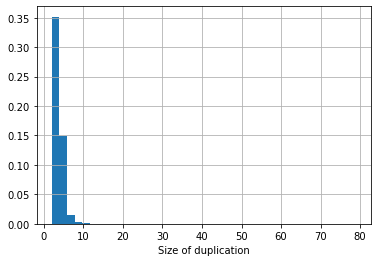

In [29]:
# Distribution of duplicated projects
hist = setdupli['PROJECT_ID'].hist(bins=40, density=True)
hist.set_xlabel("Size of duplication")
plt.savefig('hist_duplicated.png')

In [30]:
# identify duplicate value
dup.head()

,PROJECT_ID,ABSTRACT,FY,PROJECT_TERMS,PROJECT_TITLE,DEPARTMENT,AGENCY,IC_CENTER,PROJECT_NUMBER,PROJECT_START_DATE,PROJECT_END_DATE,CONTACT_PI_PROJECT_LEADER,OTHER_PIS,CONGRESSIONAL_DISTRICT,DUNS_NUMBER,ORGANIZATION_NAME,ORGANIZATION_CITY,ORGANIZATION_STATE,ORGANIZATION_ZIP,ORGANIZATION_COUNTRY,BUDGET_START_DATE,BUDGET_END_DATE,CFDA_CODE,FY.y,FY_TOTAL_COST,FY_TOTAL_COST_SUB_PROJECTS,ORG_COUNT,PI_COUNT,ID_dupli
0,89996,"This is a project to explore Game-based, Metap...",2008,Achievement; analog; base; Cognitive Science; ...,RUI: CYGAMES: CYBER-ENABLED TEACHING AND LEARN...,NSF,NSF,NaN,0814512,9/15/2008,8/31/2012,"REESE, DEBBIE D","CARTER, BEVERLY; WOOD, CHARLES; HITT, BEN",01,068719400,WHEELING JESUIT UNIVERSITY,WHEELING,WV,26003-6243,UNITED STATES,NaN,NaN,47.076,2008,1999467.0,NaN,1,1,595144
1,89997,Institution: Franklin Institute Science Museum...,2008,Active Learning; Child; Computer software; des...,ARIEL - AUGMENTED REALITY FOR INTERPRETIVE AND...,NSF,NSF,NaN,0741659,9/15/2008,8/31/2012,"SNYDER, STEVEN","ELINICH, KAREN; YOON, SUSAN",02,001741859,FRANKLIN INSTITUTE,PHILADELPHIA,PA,19103-1115,UNITED STATES,NaN,NaN,47.076,2008,1799699.0,NaN,1,1,329530
2,89998,Through programs (including small group conver...,2008,Address; Age; Birth; Brain; Caregivers; Child;...,BRIGHTER FUTURES: PUBLIC DELIBERATION ABOUT TH...,NSF,NSF,NaN,0813522,9/15/2008,8/31/2011,"FINK, LAURIE KLEINBAUM","CADIGAN, KAREN; ELLENBOGEN, KIRSTEN",04,061451670,SCIENCE MUSEUM OF MINNESOTA,SAINT PAUL,MN,55102-1202,UNITED STATES,NaN,NaN,47.076,2008,1505858.0,NaN,1,1,647989
3,89999,In partnership with the American Chemical Soci...,2008,Advanced Development; American; Chemicals; Che...,FOSTERING US-INTERNATIONAL COLLABORATIVE PARTN...,NSF,NSF,NaN,0838627,8/1/2008,12/31/2010,"JOST, JOHN W","MILLER, BRADLEY; BOWMAN, KATHERINE",04,009059242,INTERNATIONAL UNION OF PURE AND APPLIED CHEMISTRY,DURHAM,NC,27709-3757,UNITED STATES,NaN,NaN,47.049,2008,51000.0,NaN,1,1,321746
4,90000,Amphibian populations around the world are exp...,2008,Amphibia; Central America; Communicable Diseas...,COLLABORATIVE RESEARCH: EVOLUTION OF AMPHIBIAN...,NSF,NSF,NaN,0815315,10/1/2008,9/30/2011,"ZAMUDIO, KELLY R",NaN,22,872612445,CORNELL UNIVERSITY ITHACA,ITHACA,NY,14850-2820,UNITED STATES,NaN,NaN,47.074,2008,370996.0,NaN,2,2,46307


In [31]:
# Count the number of na value per variable and subset
group_na = dup.isnull().groupby(dup.ID_dupli).sum()
group_na.head()

,PROJECT_ID,ABSTRACT,FY,PROJECT_TERMS,PROJECT_TITLE,DEPARTMENT,AGENCY,IC_CENTER,PROJECT_NUMBER,PROJECT_START_DATE,PROJECT_END_DATE,CONTACT_PI_PROJECT_LEADER,OTHER_PIS,CONGRESSIONAL_DISTRICT,DUNS_NUMBER,ORGANIZATION_NAME,ORGANIZATION_CITY,ORGANIZATION_STATE,ORGANIZATION_ZIP,ORGANIZATION_COUNTRY,BUDGET_START_DATE,BUDGET_END_DATE,CFDA_CODE,FY.y,FY_TOTAL_COST,FY_TOTAL_COST_SUB_PROJECTS,ORG_COUNT,PI_COUNT,ID_dupli
ID_dupli,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,2,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0


In [32]:
# Remove the na from the size of each subset.
# What if the size of duplication = number of Na value ? - impossible to compute the metric
for col in group_na.columns:
    group_na[col] = setdupli['PROJECT_ID'] - group_na[col]

In [33]:
# size of each deduplicated subset
group_na.head()

,PROJECT_ID,ABSTRACT,FY,PROJECT_TERMS,PROJECT_TITLE,DEPARTMENT,AGENCY,IC_CENTER,PROJECT_NUMBER,PROJECT_START_DATE,PROJECT_END_DATE,CONTACT_PI_PROJECT_LEADER,OTHER_PIS,CONGRESSIONAL_DISTRICT,DUNS_NUMBER,ORGANIZATION_NAME,ORGANIZATION_CITY,ORGANIZATION_STATE,ORGANIZATION_ZIP,ORGANIZATION_COUNTRY,BUDGET_START_DATE,BUDGET_END_DATE,CFDA_CODE,FY.y,FY_TOTAL_COST,FY_TOTAL_COST_SUB_PROJECTS,ORG_COUNT,PI_COUNT,ID_dupli
ID_dupli,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7.0,7.0,7.0,5.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,0.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,0.0,7.0,7.0,7.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0


In [34]:
# Compute the proportion of unique value per variable using the number of project ID by ID_dupli
propdu = (setdupli).iloc[:,1:].div(setdupli['PROJECT_ID'], axis=0)
propdu.head()

,ABSTRACT,FY,PROJECT_TERMS,PROJECT_TITLE,DEPARTMENT,AGENCY,IC_CENTER,PROJECT_NUMBER,PROJECT_START_DATE,PROJECT_END_DATE,CONTACT_PI_PROJECT_LEADER,OTHER_PIS,CONGRESSIONAL_DISTRICT,DUNS_NUMBER,ORGANIZATION_NAME,ORGANIZATION_CITY,ORGANIZATION_STATE,ORGANIZATION_ZIP,ORGANIZATION_COUNTRY,BUDGET_START_DATE,BUDGET_END_DATE,CFDA_CODE,FY.y,FY_TOTAL_COST,FY_TOTAL_COST_SUB_PROJECTS,ORG_COUNT,PI_COUNT
ID_dupli,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.142857,0.714286,0.142857,0.142857,0.142857,0.142857,0.142857,1.0,0.142857,0.285714,0.142857,0.0,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.714286,0.714286,0.142857,0.714286,0.428571,0.0,0.142857,0.142857
4,0.500000,1.000000,0.500000,0.500000,0.500000,0.500000,0.500000,1.0,0.500000,1.000000,0.500000,0.0,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.0,0.500000,0.500000
6,0.333333,1.000000,1.000000,0.333333,0.333333,0.333333,0.333333,1.0,0.333333,0.333333,0.333333,0.0,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,1.000000,1.000000,0.333333,1.000000,1.000000,0.0,0.333333,0.333333
8,0.500000,1.000000,1.000000,0.500000,0.500000,0.500000,0.500000,1.0,0.500000,0.500000,0.500000,0.0,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,1.000000,1.000000,0.500000,1.000000,1.000000,0.0,0.500000,0.500000
10,0.500000,1.000000,1.000000,0.500000,0.500000,0.500000,0.500000,1.0,0.500000,0.500000,0.500000,0.0,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,1.000000,1.000000,0.500000,1.000000,1.000000,0.0,0.500000,0.500000


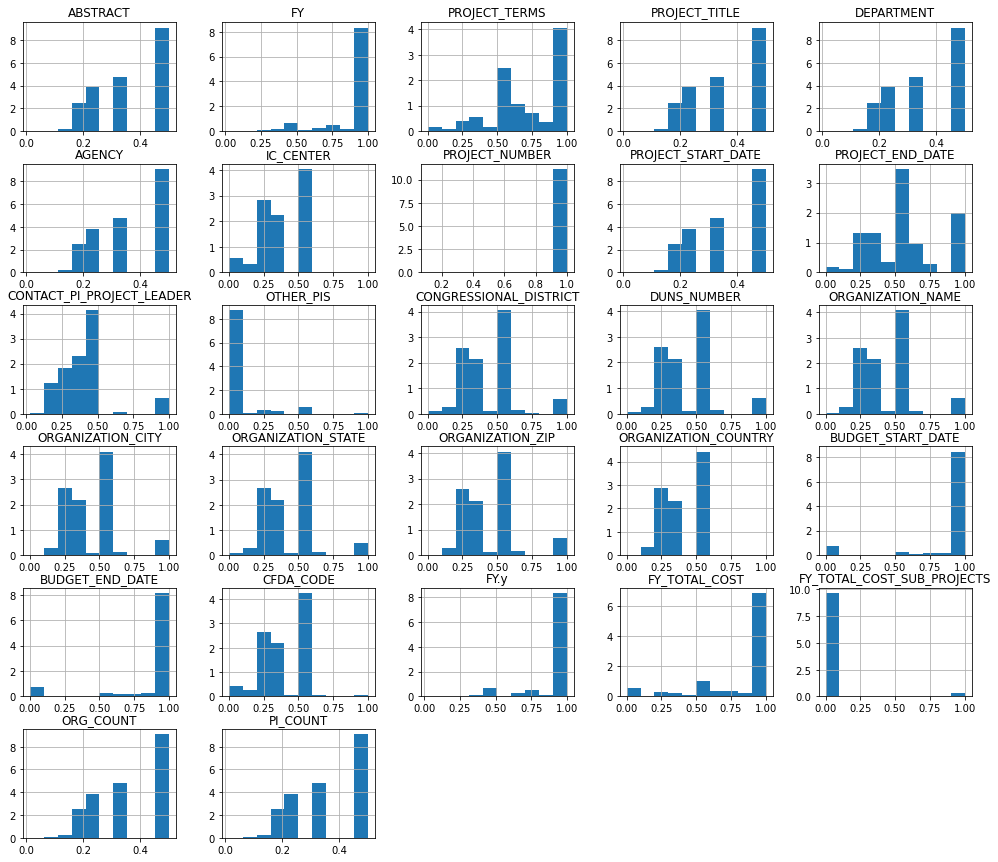

In [35]:
# Analyse the distribution graph of each variable to identify the source heterogeneity in duplicated projects
hist = propdu.hist(bins=10, density=True, figsize=(17,15))
plt.savefig('metric.png')

In [36]:
# For each subset and variable, compute the distance (metric and baseline)
gap = np.power((propdu).iloc[:,0:].sub(propdu['ABSTRACT'], axis=0),2)

# Compute the distance for each variable to identify the most similar variables (min distance)
gapsum = gap.sum().sort_values(ascending=False)
distance = np.sqrt(gapsum)
distance

PROJECT_NUMBER                284.325991
BUDGET_START_DATE             272.057374
BUDGET_END_DATE               268.123849
FY.y                          262.681927
FY                            262.681927
FY_TOTAL_COST                 243.401538
PROJECT_TERMS                 197.360287
FY_TOTAL_COST_SUB_PROJECTS    178.508422
OTHER_PIS                     164.059019
PROJECT_END_DATE              129.695798
ORGANIZATION_ZIP               68.809107
DUNS_NUMBER                    68.402610
ORGANIZATION_NAME              66.254922
CONGRESSIONAL_DISTRICT         66.082730
CONTACT_PI_PROJECT_LEADER      65.167577
ORGANIZATION_CITY              63.712626
ORGANIZATION_STATE             59.736583
IC_CENTER                      48.070810
CFDA_CODE                      45.144756
ORGANIZATION_COUNTRY            5.732975
DEPARTMENT                      0.000000
PROJECT_TITLE                   0.000000
PI_COUNT                        0.000000
AGENCY                          0.000000
PROJECT_START_DA

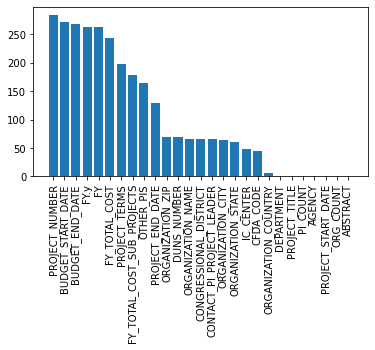

In [37]:
# Plot the bar graph
plt.bar(distance.index.to_series(), distance)
plt.xticks(distance.index.to_series(), rotation=90)
plt.subplots_adjust(bottom=0.4, top=0.99)
plt.savefig('distance.png')

In [38]:
# Plot the scatter between size duplication and total cost
all_grp = dup.groupby(['ID_dupli'])

# for each unique ABSTRACT/TITLE/START_DATE in whole df, sum the Total_cost
unique_cost = all_grp.agg({'FY_TOTAL_COST' : 'sum'}) 

#rename column as "count" to be different than original column
unique_cost = unique_cost.rename(columns={'FY_TOTAL_COST': 'TOTAL_COST_SUM'})

# merge data frame with "unique_all" to bring in the unique PI counts for each "duplicate" group
group_dupli1 = group_dupli.merge(unique_cost, how='left', on=['ID_dupli'])

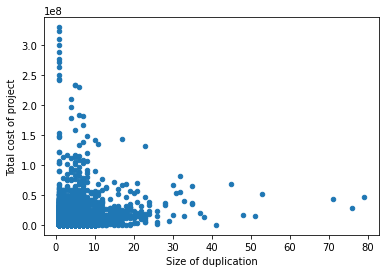

In [39]:
# Plot the scatter plot between the of duplication and the total cost
scatter = group_dupli1.plot.scatter(x='PROJECT_ID', y='TOTAL_COST_SUM')
scatter.set_xlabel("Size of duplication")
scatter.set_ylabel("Total cost of project")
plt.savefig('scatter.png')

In [40]:
# list the main major projects with a high level of duplication
group_dupli1['Higher'] = group_dupli1['PROJECT_ID']>40
subset = group_dupli1[['PROJECT_ID','TOTAL_COST_SUM','Higher']]
subset.head()

# Merge the dataset with the set of duplicated and print only the highest value
merge3= dup.merge(subset, how='left', on=['ID_dupli'])
subset_merge = merge3[(merge3['Higher']==1)]

In [41]:
# save NON-duplicated rows and the LAST occurrance of duplicated rows
subset_merge[~subset_merge.duplicated(subset=['ID_dupli'], keep='last')]

,PROJECT_ID_x,ABSTRACT,FY,PROJECT_TERMS,PROJECT_TITLE,DEPARTMENT,AGENCY,IC_CENTER,PROJECT_NUMBER,PROJECT_START_DATE,PROJECT_END_DATE,CONTACT_PI_PROJECT_LEADER,OTHER_PIS,CONGRESSIONAL_DISTRICT,DUNS_NUMBER,ORGANIZATION_NAME,ORGANIZATION_CITY,ORGANIZATION_STATE,ORGANIZATION_ZIP,ORGANIZATION_COUNTRY,BUDGET_START_DATE,BUDGET_END_DATE,CFDA_CODE,FY.y,FY_TOTAL_COST,FY_TOTAL_COST_SUB_PROJECTS,ORG_COUNT,PI_COUNT,ID_dupli,PROJECT_ID_y,TOTAL_COST_SUM,Higher
498181,722124,The National Children's Study (NCS) is prospec...,2012,21 year old; Address; Adolescent; Adult; Age; ...,NATIONAL CHILDREN'S STUDY,HHS,NIH,NICHD,275200800025C-9-0-1,9/26/2008,9/25/2013,"MURRAY, JEFFREY",NaN,02,062761671,UNIVERSITY OF IOWA,IOWA CITY,IA,522421320,UNITED STATES,NaN,NaN,NaN,2012,1369414.0,NaN,22,15,501507,45,67785562.0,True
584724,722265,"To provide state-of-the-art, large-scale genom...",2013,Basic Science; Categories; Communicable Diseas...,GENOMIC SEQUENCING CENTER FOR INFECTIOUS DISEASES,HHS,NIH,NIAID,272200900007C-9-0-2,4/1/2009,3/30/2014,"NIERMAN, WILLIAM",NaN,52,076364392,J CRAIG VENTER INSTITUTE INC,LA JOLLA,CA,920373498,UNITED STATES,NaN,NaN,NaN,2013,630091.0,NaN,1,2,650565,53,51697194.0,True
670198,725166,Acute lung injury (ALI) and its more severe fo...,2014,Acute; Acute Lung Injury; Adult; Adult Respira...,TREATMENT OF ACUTE LUNG INJURY AND ACUTE RESPI...,HHS,NIH,NHLBI,N01HR56174-20-0-1,9/30/2005,6/30/2014,"WHEELER, ARTHUR",NaN,05,965717143,VANDERBILT UNIVERSITY,NASHVILLE,TN,372407749,UNITED STATES,NaN,NaN,NaN,2014,173361.0,NaN,13,17,40205,51,15554191.0,True
758952,892758,The Vaccine and Treatment Evaluation Units (VT...,2015,Conduct Clinical Trials; Contracts; design; Ev...,VACCINE AND TREATMENT EVALUATION UNITS,HHS,NIH,NIAID,272200800006C-21-0-2,11/1/2007,7/31/2017,"BERNSTIEN, DAVID",NaN,01,071284913,CHILDREN'S HOSPITAL MEDICAL CENTER CINCI,CINCINNATI,OH,452293039,UNITED STATES,NaN,NaN,NaN,2015,36669.0,NaN,8,11,513131,71,43031243.0,True
821712,877581,The Long-term Oxygen Treatment Trial (LOTT) is...,2016,Chronic Obstructive Airway Disease; Clinical; ...,LONG-TERM OXYGEN TREATMENT TRIAL,HHS,NIH,NHLBI,N01HR76184-13-0-1,10/31/2006,3/31/2016,"GAEKE TORRENCE, CHRISTINE",NaN,11,135781701,CLEVELAND CLINIC LERNER COL/MED-CWRU,CLEVELAND,OH,441950001,UNITED STATES,NaN,NaN,NaN,2016,7046.0,NaN,16,21,497779,48,16171940.0,True
826015,881961,The goal of the Structural Genomics Centers fo...,2016,Basic Science; Biological; Biomedical Research...,STRUCTURAL GENOMICS CENTERS FOR INFECTIOUS DIS...,HHS,NIH,NIAID,272201200026C-9-0-3,9/1/2012,8/31/2017,"ANDERSON, WAYNE",NaN,07,005436803,NORTHWESTERN UNIVERSITY AT CHICAGO,CHICAGO,IL,606113152,UNITED STATES,NaN,NaN,NaN,2016,68752.0,NaN,3,2,528150,79,46500318.0,True
922055,991378,This contract provides for the development and...,2017,Animal Model; animal model development; Commun...,ANIMAL MODELS OF INFECTIOUS DISEASES SUPPORT,HHS,NIH,NIAID,272201700014I-0-27200001-1,7/14/2017,7/13/2024,",",NaN,06,076137314,BIOMEDICAL RESEARCH INSTITUTE,ROCKVILLE,MD,208503345,UNITED STATES,NaN,NaN,NaN,2017,3500.0,NaN,31,2,591561,41,143500.0,True
1111335,1170004,The goal of the Structural Genomics Centers fo...,2019,Antimicrobial Resistance; Basic Science; Biolo...,STRUCTURAL GENOMICS CENTERS FOR INFECTIOUS DIS...,HHS,NIH,NIAID,272201700060C-P00007-9999-10,9/1/2017,8/31/2020,"SATCHELL, KARLA",NaN,07,005436803,NORTHWESTERN UNIVERSITY AT CHICAGO,CHICAGO,IL,606113152,UNITED STATES,NaN,NaN,NaN,2019,1295009.0,NaN,3,2,528151,76,28237712.0,True


In [43]:
# Analyse project by project
# 1. project with size = 79 
subset_merge[subset_merge['PROJECT_ID_y']==79]

,PROJECT_ID_x,ABSTRACT,FY,PROJECT_TERMS,PROJECT_TITLE,DEPARTMENT,AGENCY,IC_CENTER,PROJECT_NUMBER,PROJECT_START_DATE,PROJECT_END_DATE,CONTACT_PI_PROJECT_LEADER,OTHER_PIS,CONGRESSIONAL_DISTRICT,DUNS_NUMBER,ORGANIZATION_NAME,ORGANIZATION_CITY,ORGANIZATION_STATE,ORGANIZATION_ZIP,ORGANIZATION_COUNTRY,BUDGET_START_DATE,BUDGET_END_DATE,CFDA_CODE,FY.y,FY_TOTAL_COST,FY_TOTAL_COST_SUB_PROJECTS,ORG_COUNT,PI_COUNT,ID_dupli,PROJECT_ID_y,TOTAL_COST_SUM,Higher
493937,693047,The goal of the Structural Genomics Centers fo...,2012,Basic Science; Biological; Biomedical Research...,STRUCTURAL GENOMICS CENTERS FOR INFECTIOUS DIS...,HHS,NIH,NIAID,272201200025C-0-0-2,9/1/2012,8/31/2013,"MYLER, PETER",NaN,07,070967955,SEATTLE BIOMEDICAL RESEARCH INSTITUTE,SEATTLE,WA,981095240,UNITED STATES,NaN,NaN,NaN,2012,60000.0,NaN,3,2,528150,79,46500318.0,True
494117,694164,The goal of the Structural Genomics Centers fo...,2012,Basic Science; Biological; Biomedical Research...,STRUCTURAL GENOMICS CENTERS FOR INFECTIOUS DIS...,HHS,NIH,NIAID,272201200025C-0-0-5,9/1/2012,8/31/2013,"MYLER, PETER",NaN,07,070967955,SEATTLE BIOMEDICAL RESEARCH INSTITUTE,SEATTLE,WA,981095240,UNITED STATES,NaN,NaN,NaN,2012,274113.0,NaN,3,2,528150,79,46500318.0,True
494709,698277,The goal of the Structural Genomics Centers fo...,2012,Basic Science; Biological; Biomedical Research...,STRUCTURAL GENOMICS CENTERS FOR INFECTIOUS DIS...,HHS,NIH,NIAID,272201200026C-1-0-8,9/1/2012,8/31/2013,"ANDERSON, WAYNE",NaN,09,160079455,NORTHWESTERN UNIVERSITY,EVANSTON,IL,602013149,UNITED STATES,NaN,NaN,NaN,2012,734732.0,NaN,3,2,528150,79,46500318.0,True
495139,701378,The goal of the Structural Genomics Centers fo...,2012,Basic Science; Biological; Biomedical Research...,STRUCTURAL GENOMICS CENTERS FOR INFECTIOUS DIS...,HHS,NIH,NIAID,272201200025C-0-0-1,9/1/2012,8/31/2013,"MYLER, PETER",NaN,07,070967955,SEATTLE BIOMEDICAL RESEARCH INSTITUTE,SEATTLE,WA,981095240,UNITED STATES,NaN,NaN,NaN,2012,1864807.0,NaN,3,2,528150,79,46500318.0,True
496293,709273,The goal of the Structural Genomics Centers fo...,2012,Basic Science; Biological; Biomedical Research...,STRUCTURAL GENOMICS CENTERS FOR INFECTIOUS DIS...,HHS,NIH,NIAID,272201200026C-1-0-3,9/1/2012,8/31/2013,"ANDERSON, WAYNE",NaN,09,160079455,NORTHWESTERN UNIVERSITY,EVANSTON,IL,602013149,UNITED STATES,NaN,NaN,NaN,2012,489820.0,NaN,3,2,528150,79,46500318.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811404,867077,The goal of the Structural Genomics Centers fo...,2016,Basic Science; Biological; Biomedical Research...,STRUCTURAL GENOMICS CENTERS FOR INFECTIOUS DIS...,HHS,NIH,NIAID,272201200025C-10-0-3,9/1/2012,8/31/2017,"MYLER, PETER",NaN,07,070967955,SEATTLE BIOMEDICAL RESEARCH INSTITUTE,SEATTLE,WA,981095240,UNITED STATES,NaN,NaN,NaN,2016,843543.0,NaN,3,2,528150,79,46500318.0,True
815018,869620,The goal of the Structural Genomics Centers fo...,2016,Bacillus anthracis; Basic Science; Biological;...,STRUCTURAL GENOMICS CENTERS FOR INFECTIOUS DIS...,HHS,NIH,NIAID,272201200026C-9-0-2,9/1/2012,8/31/2017,"ANDERSON, WAYNE",NaN,07,005436803,NORTHWESTERN UNIVERSITY AT CHICAGO,CHICAGO,IL,606113152,UNITED STATES,NaN,NaN,NaN,2016,891026.0,NaN,3,2,528150,79,46500318.0,True
816058,871821,The goal of the Structural Genomics Centers fo...,2016,Basic Science; Biological; Biomedical Research...,STRUCTURAL GENOMICS CENTERS FOR INFECTIOUS DIS...,HHS,NIH,NIAID,272201200026C-9-0-10,9/1/2012,8/31/2017,"ANDERSON, WAYNE",NaN,07,005436803,NORTHWESTERN UNIVERSITY AT CHICAGO,CHICAGO,IL,606113152,UNITED STATES,NaN,NaN,NaN,2016,68752.0,NaN,3,2,528150,79,46500318.0,True
825234,881166,The goal of the Structural Genomics Centers fo...,2016,Basic Science; Biological; Biomedical Research...,STRUCTURAL GENOMICS CENTERS FOR INFECTIOUS DIS...,HHS,NIH,NIAID,272201200026C-9-0-11,9/1/2012,8/31/2017,"ANDERSON, WAYNE",NaN,07,005436803,NORTHWESTERN UNIVERSITY AT CHICAGO,CHICAGO,IL,606113152,UNITED STATES,NaN,NaN,NaN,2

In [44]:
# List all the distinction we have for a given observation of ID-dupli
group_dupli.iloc[528150]

PROJECT_ID                    79
ABSTRACT                       1
FY                             5
PROJECT_TERMS                 37
PROJECT_TITLE                  1
DEPARTMENT                     1
AGENCY                         1
IC_CENTER                      1
PROJECT_NUMBER                79
PROJECT_START_DATE             1
PROJECT_END_DATE               5
CONTACT_PI_PROJECT_LEADER      2
OTHER_PIS                      0
CONGRESSIONAL_DISTRICT         2
DUNS_NUMBER                    3
ORGANIZATION_NAME              3
ORGANIZATION_CITY              3
ORGANIZATION_STATE             2
ORGANIZATION_ZIP               3
ORGANIZATION_COUNTRY           1
BUDGET_START_DATE              0
BUDGET_END_DATE                0
CFDA_CODE                      0
FY.y                           5
FY_TOTAL_COST                 54
FY_TOTAL_COST_SUB_PROJECTS     0
ORG_COUNT                      1
PI_COUNT                       1
Name: 528150, dtype: int64

In [45]:
# Descriptive analyse of some variable in the dataset
Tab_test = subset_merge[subset_merge['PROJECT_ID_y']==79]
#Tab_test['FY'].value_counts()
Tab_test['FY_TOTAL_COST'].describe()

count    7.900000e+01
mean     5.886116e+05
std      5.556479e+05
min      1.500700e+04
25%      1.449530e+05
50%      3.895660e+05
75%      8.910275e+05
max      2.191313e+06
Name: FY_TOTAL_COST, dtype: float64

In [118]:
# list the main major hihly costly project
group_dupli1['Higher_cost'] = group_dupli1['TOTAL_COST_SUM']> 200000000 
subset1 = group_dupli1[['PROJECT_ID','TOTAL_COST_SUM','Higher_cost']]
subset1.head()

# Merge the dataset with the set of duplicated and print only the highest value
merge3= dup.merge(subset1, how='left', on=['ID_dupli'])
subset_merge = merge3[(merge3['Higher_cost']==1)]

In [119]:
# save NON-duplicated rows and the LAST occurrance of duplicated rows
subset_merge[~subset_merge.duplicated(subset=['ID_dupli'], keep='last')]

,PROJECT_ID_x,ABSTRACT,FY,PROJECT_TERMS,PROJECT_TITLE,DEPARTMENT,AGENCY,IC_CENTER,PROJECT_NUMBER,PROJECT_START_DATE,PROJECT_END_DATE,CONTACT_PI_PROJECT_LEADER,OTHER_PIS,CONGRESSIONAL_DISTRICT,DUNS_NUMBER,ORGANIZATION_NAME,ORGANIZATION_CITY,ORGANIZATION_STATE,ORGANIZATION_ZIP,ORGANIZATION_COUNTRY,BUDGET_START_DATE,BUDGET_END_DATE,CFDA_CODE,FY.y,FY_TOTAL_COST,FY_TOTAL_COST_SUB_PROJECTS,ORG_COUNT,PI_COUNT,ID_dupli,PROJECT_ID_y,TOTAL_COST_SUM,Higher_cost
210726,703623,Delivering Biomedical Information Services In ...,2009,Address; Administrator; Adoption; Adverse even...,NATIONAL BIOMEDICAL INFORMATION SERVICES,HHS,NIH,NLM,1ZIHLM200888-01,2009,NaN,"HUMPHREYS, BETSY",NaN,NaN,022051333,NATIONAL INSTITUTES OF HEALTH,BEHTESDA,MD,NaN,UNITED STATES,NaN,NaN,NaN,2009,250355446.0,NaN,1,1,285578,1,250355446.0,True
317801,712103,Delivering Biomedical Information Services In ...,2010,Information Services,NATIONAL BIOMEDICAL INFORMATION SERVICES,HHS,NIH,NLM,1ZIHLM200888-02,2010,NaN,"HUMPHREYS, BETSY",NaN,NaN,022051333,NATIONAL INSTITUTES OF HEALTH,BEHTESDA,MD,NaN,UNITED STATES,NaN,NaN,NaN,2010,242345898.0,NaN,1,1,285579,1,242345898.0,True
410437,710776,Delivering Biomedical Information Services In ...,2011,Address; Administrator; Adoption; Adverse effe...,NATIONAL BIOMEDICAL INFORMATION SERVICES,HHS,NIH,NLM,1ZIHLM200888-03,2011,NaN,"HUMPHREYS, BETSY",NaN,NaN,022051333,NATIONAL INSTITUTES OF HEALTH,BEHTESDA,MD,NaN,UNITED STATES,NaN,NaN,NaN,2011,243390438.0,NaN,1,1,285580,1,243390438.0,True
497343,716200,Delivering Biomedical Information Services In ...,2012,Address; Administrator; Adopted; Adoption; Adv...,NATIONAL BIOMEDICAL INFORMATION SERVICES,HHS,NIH,NLM,1ZIHLM200888-04,2012,NaN,"HUMPHREYS, BETSY",NaN,NaN,022051333,NATIONAL INSTITUTES OF HEALTH,BEHTESDA,MD,NaN,UNITED STATES,NaN,NaN,NaN,2012,271746213.0,NaN,1,1,285581,1,271746213.0,True
583779,715322,Delivering Biomedical Information Services In ...,2013,Address; Administrator; Adoption; Adverse effe...,NATIONAL BIOMEDICAL INFORMATION SERVICES,HHS,NIH,NLM,1ZIHLM200888-05,2013,NaN,"HUMPHREYS, BETSY",NaN,NaN,022051333,NATIONAL INSTITUTES OF HEALTH,BEHTESDA,MD,NaN,UNITED STATES,NaN,NaN,NaN,2013,263817945.0,NaN,1,1,285582,1,263817945.0,True
667271,703766,Delivering Biomedical Information Services In ...,2014,3-Dimensional; Address; Administrator; Adoptio...,NATIONAL BIOMEDICAL INFORMATION SERVICES,HHS,NIH,NLM,1ZIHLM200888-06,2014,NaN,"HUMPHREYS, BETSY",NaN,NaN,022051333,NATIONAL INSTITUTES OF HEALTH,BEHTESDA,MD,NaN,UNITED STATES,NaN,NaN,NaN,2014,275871489.0,NaN,1,1,285583,1,275871489.0,True
754643,888187,Delivering Biomedical Information Services In ...,2015,3-Dimensional; Address; Administrator; Adverse...,NATIONAL BIOMEDICAL INFORMATION SERVICES,HHS,NIH,NLM,1ZIHLM200888-07,2015,NaN,"HUMPHREYS, BETSY",NaN,NaN,022051333,NATIONAL INSTITUTES OF HEALTH,BEHTESDA,MD,NaN,UNITED STATES,NaN,NaN,NaN,2015,287906483.0,NaN,1,1,285584,1,287906483.0,True
797886,853257,Delivering Biomedical Information Services In ...,2016,3-Dimensional; Address; Adverse effects; Afric...,NATIONAL BIOMEDICAL INFORMATION SERVICES,HHS,NIH,NLM,1ZIHLM200888-08,2016,NaN,"HUMPHREYS, BETSY",NaN,NaN,022051333,NATIONAL INSTITUTES OF HEALTH,BEHTESDA,MD,NaN,UNITED STATES,NaN,NaN,NaN,2016,300605102.0,NaN,1,1,285585,1,300605102.0,True
877464,946445,Delivering Biomedical Information Services In ...,2017,Address; Adverse event; African American; Amen...,NATIONAL BIOMEDICAL INFORMATION SERVICES,HHS,NIH,NLM,1ZIHLM200888-09,2017,NaN,"HUMPHREYS, BETSY",NaN,NaN,022051333,NATIONAL INSTITUTES OF HEALTH,BEHTESDA,MD,NaN,UNITED STATES,NaN,NaN,NaN,2017,309811058.0,NaN,1,1,285586,1,309811058.0,True
974996,1042051,Delivering Biomedical Information Services In ...,2018,Address; Adverse event; African American; Amen...,NATIONAL BIOMEDICAL INFORMATION SERVICES,HHS,NIH,NLM,1ZIHLM200888-10,2018,NaN,"SHEEHAN, JERRY",NaN,NaN,022051333,NATIONAL INSTITUTES OF HEALTH,BEHTESDA,MD,NaN,UNITED STATES,NaN,NaN,NaN,2018,322798326.0,NaN,1,1,285587,1,322798326.0,True


In [117]:
# Analyse project by project
# 1. project with size = 79 
subset_merge[subset_merge['TOTAL_COST_SUM']==300605102.0]

,PROJECT_ID_x,ABSTRACT,FY,PROJECT_TERMS,PROJECT_TITLE,DEPARTMENT,AGENCY,IC_CENTER,PROJECT_NUMBER,PROJECT_START_DATE,PROJECT_END_DATE,CONTACT_PI_PROJECT_LEADER,OTHER_PIS,CONGRESSIONAL_DISTRICT,DUNS_NUMBER,ORGANIZATION_NAME,ORGANIZATION_CITY,ORGANIZATION_STATE,ORGANIZATION_ZIP,ORGANIZATION_COUNTRY,BUDGET_START_DATE,BUDGET_END_DATE,CFDA_CODE,FY.y,FY_TOTAL_COST,FY_TOTAL_COST_SUB_PROJECTS,ORG_COUNT,PI_COUNT,ID_dupli,PROJECT_ID_y,TOTAL_COST_SUM,Higher_cost
797886,853257,Delivering Biomedical Information Services In ...,2016,3-Dimensional; Address; Adverse effects; Afric...,NATIONAL BIOMEDICAL INFORMATION SERVICES,HHS,NIH,NLM,1ZIHLM200888-08,2016,NaN,"HUMPHREYS, BETSY",NaN,NaN,022051333,NATIONAL INSTITUTES OF HEALTH,BEHTESDA,MD,NaN,UNITED STATES,NaN,NaN,NaN,2016,300605102.0,NaN,1,1,285585,1,300605102.0,True


In [42]:
# Identify the ID-duplication with a size of duplication = 3
group_dupli1['Lower'] = group_dupli1['PROJECT_ID']==3
subset = group_dupli1[['PROJECT_ID','TOTAL_COST_SUM','Lower']]
subset.head()

,PROJECT_ID,TOTAL_COST_SUM,Lower
ID_dupli,,,
0,1,242036.0,False
1,7,97499.0,False
2,1,499442.0,False
3,1,393480.0,False
4,2,1100000.0,False


In [45]:
# Merge the dataset to identify the project specific characteristics. Keep only project with size or duplication (Lower) = 3
merge3= dup.merge(subset, how='left', on=['ID_dupli'])
subset_merge = merge3[(merge3['Lower']==1)]

# Remove duplication and show only the LAST occurrance to get the specific ID of duplication
subset_merge[~subset_merge.duplicated(subset=['ID_dupli'], keep='last')]

,PROJECT_ID_x,ABSTRACT,FY,PROJECT_TERMS,PROJECT_TITLE,DEPARTMENT,AGENCY,IC_CENTER,PROJECT_NUMBER,PROJECT_START_DATE,PROJECT_END_DATE,CONTACT_PI_PROJECT_LEADER,OTHER_PIS,CONGRESSIONAL_DISTRICT,DUNS_NUMBER,ORGANIZATION_NAME,ORGANIZATION_CITY,ORGANIZATION_STATE,ORGANIZATION_ZIP,ORGANIZATION_COUNTRY,BUDGET_START_DATE,BUDGET_END_DATE,CFDA_CODE,FY.y,FY_TOTAL_COST,FY_TOTAL_COST_SUB_PROJECTS,ORG_COUNT,PI_COUNT,ID_dupli,PROJECT_ID_y,TOTAL_COST_SUM,Lower
186,89902,The PIs will deploy an autonomous underwater h...,2008,Data; Data Set; Development; Earthquakes; Educ...,COLLABORATIVE RESEARCH: ASSESSMENT OF T-WAVE P...,NSF,NSF,NaN,0825330,10/1/2008,9/30/2012,"DZIAK, ROBERT P","MATSUMOTO, HARUYOSHI",05,053599908,OREGON STATE UNIVERSITY,CORVALLIS,OR,97331-8507,UNITED STATES,NaN,NaN,47.050,2008,754579.0,NaN,3,3,504403,3,1180227.0,True
195,89895,"Decomposition, the breakdown of dead plant and...",2008,Affect; Animals; Area; Arizona; Carbon; Commun...,COLLABORATIVE RESEARCH: DECOMPOSITION IN DRYLA...,NSF,NSF,NaN,0815897,10/1/2008,9/30/2012,"BARNES, PAUL W",NaN,02,008203309,LOYOLA UNIVERSITY IN NEW ORLEANS,NEW ORLEANS,LA,70118-6143,UNITED STATES,NaN,NaN,47.074,2008,128252.0,NaN,3,3,285270,3,617290.0,True
320,89785,AbstractThis award provides funding for manage...,2008,abstracting; Address; Advisory Committees; Awa...,COLLABORATIVE RESEARCH: CENTERS FOR OCEAN SCIE...,NSF,NSF,NaN,0827953,10/1/2008,9/30/2013,"SCOWCROFT, GAIL A",NaN,02,796475382,UNIVERSITY OF RHODE ISLAND,KINGSTON,RI,02881-1967,UNITED STATES,NaN,NaN,47.050,2008,998405.0,NaN,3,3,38419,3,1256004.0,True
413,90136,If physical models are to achieve a realistic ...,2008,Beds; Calculi; Cereals; climate change; Disast...,COLLABORATIVE RESEARCH: GEOMORPHIC TRANSPORT L...,NSF,NSF,NaN,0823965,9/15/2008,8/31/2011,"MEERSCHAERT, MARK M",NaN,08,193247145,MICHIGAN STATE UNIVERSITY,EAST LANSING,MI,48824-1046,UNITED STATES,NaN,NaN,47.050,2008,99232.0,NaN,3,3,317330,3,394017.0,True
418,90143,"Grassland degradation is a global concern, aff...",2008,Adopted; Affect; base; Biodiversity; Biologica...,CNH: COLLABORATIVE RESEARCH: DETERMINANTS OF G...,NSF,NSF,NaN,0815441,9/15/2008,8/31/2013,"HARRIS, RICHARD B","BEDUNAH, DONALD",00,010379790,UNIVERSITY OF MONTANA,MISSOULA,MT,59812-0001,UNITED STATES,NaN,NaN,47.075,2008,556922.0,NaN,3,3,309397,3,1053858.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113569,1179728,Project SummaryThis training grant application...,2019,aging brain; Neurodegenerative Disorders; Rese...,POSTDOCTORAL RESEARCH TRAINING IN NEURODEGENER...,HHS,NIH,NIA,5T32AG052909-03,5/1/2017,4/30/2022,"WISNIEWSKI, THOMAS M","SCHARFMAN, HELEN E ;",12,121911077,NEW YORK UNIVERSITY SCHOOL OF MEDICINE,NEW YORK,NY,10016,UNITED STATES,5/1/2019,4/30/2020,93.866,2019,216607.0,NaN,1,1,441440,3,558667.0,True
1113595,1181863,Project Summary/Abstract The use of metals in ...,2019,3-Dimensional; Affinity; Amino Acid Sequence; ...,SPECIFIC INHIBITION OF TRANSCRIPTION FACTORS W...,HHS,NIH,NIGMS,5R01GM121518-03,7/15/2017,4/30/2021,"MEADE, THOMAS J",NaN,09,160079455,NORTHWESTERN UNIVERSITY,CHICAGO,IL,606114579,UNITED STATES,5/1/2019,4/30/2020,93.859,2019,293567.0,NaN,1,1,426043,3,898181.0,True
1113598,1182049,7. Project Summary/AbstractThis is a renewal a...,2019,Research; Substance abuse problem; Training,TRAINING IN PHARMACONEUROIMMUNE SUBSTANCE ABUS...,HHS,NIH,NIDA,5T32DA007097-38,1/1/1979,6/30/2022,"MOLITOR, THOMAS WILLIAM",NaN,05,555917996,UNIVERSITY OF MINNESOTA TWIN CITIES,MINNEAPOLIS,MN,554552070,UNITED STATES,7/1/2019,6/30/2020,93.279,2019,643752.0,NaN,1,1,8122,3,1569639.0,True
1113599,1182183,Collagen is the most abundant protein in human...,2019,Aging; Atherosclerosis; base; Binding; Biocomp...,A PEPTIDE MODEL TO STUDY THE FIBRIL ASSEMBLY O...,HHS,NIH,NIGMS,5SC1GM121273-03,9/1/2017,8/31/2021,"XU, YUJIA",NaN,12,620127915,HUNTER COLLEGE,NEW YORK,NY,100655024,UNITED STATES,9/1/2019,8/31/2020,93.859,2019,390000.0,NaN

In [52]:
# We are going to describe a random sample of those projects: we select project number with ID-dupli= 504403, 285270, 38419, 317330
# General description of project
group_dupli.iloc[38419]

PROJECT_ID                    3
ABSTRACT                      1
FY                            1
PROJECT_TERMS                 1
PROJECT_TITLE                 1
DEPARTMENT                    1
AGENCY                        1
IC_CENTER                     0
PROJECT_NUMBER                3
PROJECT_START_DATE            1
PROJECT_END_DATE              1
CONTACT_PI_PROJECT_LEADER     3
OTHER_PIS                     0
CONGRESSIONAL_DISTRICT        2
DUNS_NUMBER                   3
ORGANIZATION_NAME             3
ORGANIZATION_CITY             3
ORGANIZATION_STATE            3
ORGANIZATION_ZIP              3
ORGANIZATION_COUNTRY          1
BUDGET_START_DATE             0
BUDGET_END_DATE               0
CFDA_CODE                     1
FY.y                          1
FY_TOTAL_COST                 3
FY_TOTAL_COST_SUB_PROJECTS    0
ORG_COUNT                     1
PI_COUNT                      1
Name: 38419, dtype: int64

In [53]:
# Description of the subset of duplication with the ID=..... 
Tab_test = subset_merge[subset_merge['ID_dupli']==38419]
Tab_test.head()

,PROJECT_ID_x,ABSTRACT,FY,PROJECT_TERMS,PROJECT_TITLE,DEPARTMENT,AGENCY,IC_CENTER,PROJECT_NUMBER,PROJECT_START_DATE,PROJECT_END_DATE,CONTACT_PI_PROJECT_LEADER,OTHER_PIS,CONGRESSIONAL_DISTRICT,DUNS_NUMBER,ORGANIZATION_NAME,ORGANIZATION_CITY,ORGANIZATION_STATE,ORGANIZATION_ZIP,ORGANIZATION_COUNTRY,BUDGET_START_DATE,BUDGET_END_DATE,CFDA_CODE,FY.y,FY_TOTAL_COST,FY_TOTAL_COST_SUB_PROJECTS,ORG_COUNT,PI_COUNT,ID_dupli,PROJECT_ID_y,TOTAL_COST_SUM,Lower
303,89798,AbstractThis award provides funding for manage...,2008,abstracting; Address; Advisory Committees; Awa...,COLLABORATIVE RESEARCH: CENTERS FOR OCEAN SCIE...,NSF,NSF,NaN,0828142,10/1/2008,9/30/2013,"SPITZER, WILLIAM S",NaN,09,073827859,NEW ENGLAND AQUARIUM CORPORATION,BOSTON,MA,02110-3399,UNITED STATES,NaN,NaN,47.050,2008,58073.0,NaN,3,3,38419,3,1256004.0,True
311,89791,AbstractThis award provides funding for manage...,2008,abstracting; Address; Advisory Committees; Awa...,COLLABORATIVE RESEARCH: CENTERS FOR OCEAN SCIE...,NSF,NSF,NaN,0827983,10/1/2008,9/30/2013,"DECHARON, ANNETTE V",NaN,02,186875787,UNIVERSITY OF MAINE ORONO,ORONO,ME,04469-5717,UNITED STATES,NaN,NaN,47.050,2008,199526.0,NaN,3,3,38419,3,1256004.0,True
320,89785,AbstractThis award provides funding for manage...,2008,abstracting; Address; Advisory Committees; Awa...,COLLABORATIVE RESEARCH: CENTERS FOR OCEAN SCIE...,NSF,NSF,NaN,0827953,10/1/2008,9/30/2013,"SCOWCROFT, GAIL A",NaN,02,796475382,UNIVERSITY OF RHODE ISLAND,KINGSTON,RI,02881-1967,UNITED STATES,NaN,NaN,47.050,2008,998405.0,NaN,3,3,38419,3,1256004.0,True
